<h1>Random Forest Classifier<h1>

In [51]:
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

phiusiil_phishing_url_website = fetch_ucirepo(id=327)

x = phiusiil_phishing_url_website.data.features.copy()
y = phiusiil_phishing_url_website.data.targets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, shuffle=True)

RFC = RandomForestClassifier(n_estimators=150, min_samples_leaf=1,min_samples_split=2, max_features='log2', max_depth=18,criterion='gini',class_weight=None,bootstrap=False)

{'uci_id': 327, 'name': 'Phishing Websites', 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites', 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv', 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 11055, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Tue Mar 05 2024', 'dataset_doi': '10.24432/C51W2X', 'creators': ['Rami Mohammad', 'Lee McCluskey'], 'intro_paper': {'title': 'An assessment of features related to phishing websites using an automated technique', 'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey', 'published_in': 'International Conference for Internet Technology and Secured Tr

In [47]:
from sklearn import metrics
RFC.fit(x_train, y_train['result'])
y_pred = RFC.predict(x_test)

print("accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(metrics.classification_report(y_test, y_pred))

accuracy:  0.968947844437745

Classification report:
              precision    recall  f1-score   support

          -1       0.98      0.96      0.97      1490
           1       0.96      0.98      0.97      1827

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



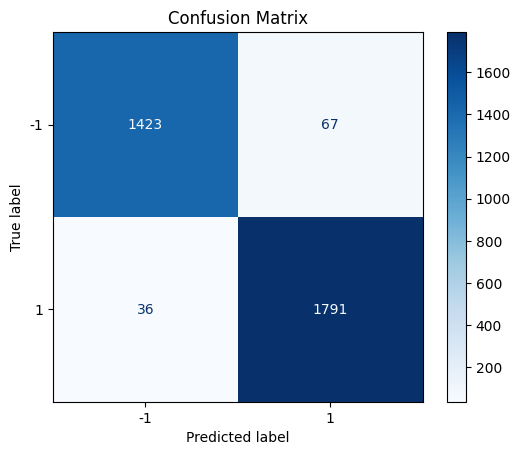

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=RFC.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RFC.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Randomized grid search

In [13]:
#{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 17, 'criterion': 'log_loss', 'class_weight': None, 'bootstrap': False}
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None] + list(range(2, 50, 5)),
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced'],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': list(range(1, 10, 2)),
    'bootstrap': [True, False],
}
random_search = RandomizedSearchCV(estimator=RFC, param_distributions=param_grid, n_iter=1000, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
random_search.fit(x_train, y_train['result'])

print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_:.2f}")

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


c:\Users\krzyw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 17, 'criterion': 'log_loss', 'class_weight': None, 'bootstrap': False}
Best score: 0.97
